## Phys Astro Data: Deep Learning using Pytorch and Keras

Objectives:
* Explain the essential components behind training a neural network
* Show simple practical example of how to program a neural network
* Contrast the two leading frameworks (Pytorch and Keras) so that people can make an informed decision.
* Try and make it useful for people who already know machine learning (with small links to papers and asides).

We will only talk about neural networks (ie deep learning) as this is what these libraries are specialized for.

### Neural Network Basics

Machine learning = learning from examples.

Let us begin with an example, consider we have a dataset containing images of digits as well as their **labels**, and we want to be able to predict the labels directly from the images.

In [1]:
%%html
<img src="https://corochann.com/wp-content/uploads/2017/02/mnist_plot-800x600.png",width=200,height=200>

If we want an automated process to design an algorithm, we need to be able to assess whether an algorithm is better than another. This is where the **loss function** comes in. A typical choice is

\begin{equation}
   MSE = \sum_{1}^{N} (y_i-\hat{y}(x_i))^2
\end{equation}

\begin{equation}
Cross Entropy := -  \sum_{1}^{N} \sum_{c=1}^My_{o,c}\log(p_{o,c})
\end{equation}
where 
* M - number of classes (0,1,2,3,4,5,6,7,8,9 for the digit recognition)
* y - binary indicator (0 or 1) if class label c is the correct classification for observation o
* p - predicted probability observation o is of class c. 

This will be maximized when $p$ is exactly equal to the corresponding y

We are interested in finding an algorithm/function that can find a low value of the loss function. We need to have some flexible way of parametrizing this function. This is where the Neural Network comes in.

In [2]:
%%html
<img src="https://cdn-images-1.medium.com/max/1600/1*QVIyc5HnGDWTNX3m-nIm9w.png",width=200,height=200>

A **neural network** contains many parameters in the form of edges and activation functions. The activations are defined as
$a_j = \Phi\left ( \sum_{i} w_{ij} a_i +b_j \right )$ 


By varying the neural network parameters, we change the mathematical function that the neural network is representing. With small changes to the parameters only leading to slight modifications in the function represented by the neural network.

If we look back to what we have done so far, through the neural network, we are able to generate many different algorithms by changing the parameters (weights, activations) and through the loss function we are able to assess which algorithm is the best. At this point, if we had infinite time we could just generate random weights and activations and keep the model that leads to the best loss function. This however, would take a really really really long time.

**Backpropagation** is what allows us to find good values for the edges and weights of our network. A full explanation is beyond the scope of this talk but we will explain intution behind it. 

Backpropagation is directly related to the **loss function**

In [3]:
%%html
<img src="https://blog.paperspace.com/content/images/2018/05/challenges-1.png",width=10,height=10>

**Backpropagation** is a way to get the gradient of the loss function, for the current set of parameters.

When we have the gradient of the loss function. We can make small changes to the parameters accordingly. If we iteratively repeat this procedure, we will then converge to a local minima. This is known as **gradient descent**.

In [4]:
%%html
<img src="https://cdn-images-1.medium.com/max/800/1*yasmQ5kvlmbYMe8eDkyl6w.png",width=10,height=10>

For purposes of illustration, we have only shown two dimensions. When we have many parameters, our loss function would have as many dimensions as there are parameters.

To summarize how a neural network is trained:  
* Create a Neural network structure and initialize it with random parameter values (weights and activation functions). For our example we want as many inputs as image pixels and as many outputs as digit choices. 

* Define a loss function which measuring how well our neural network is doing at the task (how well does it predict digits). Before the neural network is trained, the neural network will be terrible at this task.

* Iteratively, pass images through the neural network. Estimate the gradient of the parameters and update it. Iteratively improving the neural network output.

## Define Hyperparameters
Hyperparameters are values/parameters set by the user before the learning begins, in a way similar to the input parameters for our physical models. 

In [1]:
learning_rate = 0.001
n_batch = 64
n_batch_test = 1000
n_classes = 10
epochs = 5

# Pytorch Implementation

In [6]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [7]:
train_mnist = torchvision.datasets.MNIST('.', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))

test_mnist = torchvision.datasets.MNIST('.', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))



loader = torch.utils.data.DataLoader(train_mnist,batch_size=n_batch, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_mnist,batch_size=1000, shuffle=True)

We can take a look at our mnist dataset

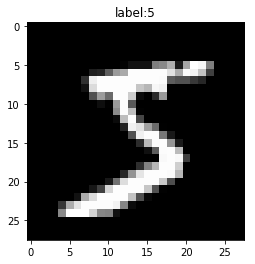

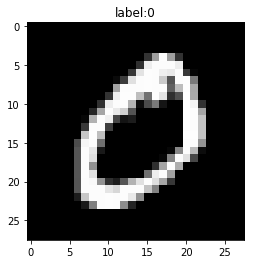

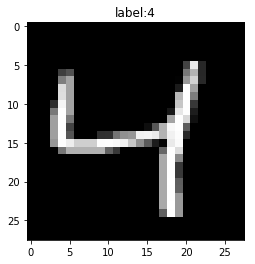

In [12]:
import matplotlib.pyplot as plt
train_mnist[0][0][0].shape
for i in range(3):
    plt.title("label:{}".format(train_mnist[i][1].numpy()))
    plt.imshow(train_mnist[i][0][0], cmap='gray', interpolation='none')
    plt.show()

In pytorch, we define our neural network by inheriting from nn.module. The forward function is the function that is called when evaluating new data

In [9]:
train_mnist[1][0]

tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0

In [13]:
class MnistNetwork(nn.Module):
    def __init__(self):
        super(MnistNetwork, self).__init__()

        self.fc = nn.Sequential(nn.Linear(28*28, 1024),
                                nn.ReLU(), 
                                nn.Linear(1024, 512),
                                nn.ReLU(),
                                nn.Linear(512,256),
                                nn.ReLU(),
                                nn.Linear(256,128),
                                nn.ReLU(),
                                nn.Linear(128, 10)
                                )

    def forward(self, x):
        output = self.fc(x)
        return output
        #return F.softmax(output, dim=1)

In [14]:
network = MnistNetwork()


we next need to define a loss function, and choose which flavour of gradient descent to use

In [15]:
# create a stochastic gradient descent optimizer
optimizer = optim.Adam(network.parameters(), lr=learning_rate)
# create a loss function
loss =  nn.CrossEntropyLoss()

We next train the neural network.

In [18]:
for _ in range(epochs):
    for i,(data,label) in enumerate(loader):
        #set the gradients to 0
        optimizer.zero_grad()
        #reshape data
        data = data.view(n_batch,28*28)
        #predict the labels for the inputs
        pred_label = network(data)
        #calculate the loss between the predicted and true labels
        err =  loss(pred_label,label)
        #backpropagate to get the derivatives
        err.backward()
        print("the loss is:{}".format(err))
        #update the weights in accordance with the backpropagation
        optimizer.step()

the loss is:0.3699260950088501
the loss is:0.2301604002714157
the loss is:0.3370080590248108
the loss is:0.49084287881851196
the loss is:0.29286646842956543
the loss is:0.630861759185791
the loss is:0.47106826305389404
the loss is:0.5762180089950562
the loss is:0.4466243088245392
the loss is:0.26295390725135803
the loss is:0.12444741278886795
the loss is:0.10392271727323532
the loss is:0.23963172733783722
the loss is:0.45624658465385437
the loss is:0.18829910457134247
the loss is:0.22249044477939606
the loss is:0.43657487630844116
the loss is:0.15464496612548828
the loss is:0.28085482120513916
the loss is:0.21797719597816467
the loss is:0.0799853503704071
the loss is:0.25625231862068176
the loss is:0.16097410023212433
the loss is:0.1941976696252823
the loss is:0.3433259129524231
the loss is:0.2217121720314026
the loss is:0.21005691587924957
the loss is:0.34178924560546875
the loss is:0.4763568043708801
the loss is:0.41333457827568054
the loss is:0.2139786183834076
the loss is:0.3510662

the loss is:0.1972634345293045
the loss is:0.3355351388454437
the loss is:0.12442783266305923
the loss is:0.4616653025150299
the loss is:0.2197376936674118
the loss is:0.45715001225471497
the loss is:0.13884387910366058
the loss is:0.24229539930820465
the loss is:0.2864378094673157
the loss is:0.3195268511772156
the loss is:0.555370032787323
the loss is:0.2786458134651184
the loss is:0.25787436962127686
the loss is:0.19152423739433289
the loss is:0.30374783277511597
the loss is:0.17759986221790314
the loss is:0.13737301528453827
the loss is:0.39483246207237244
the loss is:0.15692967176437378
the loss is:0.16546779870986938
the loss is:0.29328426718711853
the loss is:0.2045619934797287
the loss is:0.2658282220363617
the loss is:0.2277069240808487
the loss is:0.22470666468143463
the loss is:0.2882230281829834
the loss is:0.2609866261482239
the loss is:0.16175656020641327
the loss is:0.13287511467933655
the loss is:0.4907761514186859
the loss is:0.3190431296825409
the loss is:0.3904516696

KeyboardInterrupt: 

In [19]:
for i,(data,label) in enumerate(test_loader):
    data = data.view(n_batch_test,28*28)
    pred = network(data)
    pred_labels = torch.argmax(pred,1)
    a = pred_labels == label
    print(torch.sum(a).numpy()/n_batch_test)



0.937
0.935
0.931
0.933
0.943
0.931
0.916
0.938
0.93
0.943


# Keras implementation

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers.normalization import BatchNormalization
from sklearn.model_selection import train_test_split

Keras is a high level API used to construct different neural networks. Users are allowed to use different deep learning libaraies as backend (The actual code that runs the model and computation), such as TensorFlow, CNTK, or Theano.  It is a more straight-forward and user friendly API compared to Tensorflow (without the sessions, placeholder etc). 

## Import Dataset
The dataset we are going to use today , MNIST, is one of the standard dataset commonly used for branchmarking, and thus Keras has created dedicated classes to import these standard datasets. 
There are other commonly used datasets, you can find them here:https://keras.io/datasets/

In [27]:
# Keras has made it into a class
from keras.datasets import mnist
## separate data into training set and test set.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [28]:
#lets inspect the shape of each component:
print("Training set:",x_train.shape,"Training Label:",y_train.shape)
print("Test set:",x_test.shape,"Test Label:",y_test.shape)

Training set: (60000, 28, 28) Training Label: (60000,)
Test set: (10000, 28, 28) Test Label: (10000,)


The shape of each train and test set tells us how many 28x28 images are used for training and test, each images will have their own corresponding *labels*.

## Normalise the data
Neural Network works better when the data is normalised. The idea is to put every features (input data into a common scale). It is especially important when the input data has different ranges of values. There are two main reasons for this technique:
1. Un-normalised data will cause the gradient to oscillate back and forth, and the neural network will end up taking longer time to complete the training
The power of neural network relies on its ability to adjust weights, such that it can get closer to the optimum vlaue. The gradient computed at each iteration served as a guiding light for the Neural Network, so that it knows which direction it should move in order to get to the global max/min.
2. Features with higher range (such as income as compared to age), will dominate the learning as it will have the highest variation when we change the weight. Normalising the features can put every features on the same ground and thus each of them will be considered equally.

One of the most common normalisation techniques is to normalise the feature range to [0,1]. 
$$y = \frac{x - x_{min}}{x_{max}-x_{min}}$$

In [29]:
x_train = (x_train - x_train.min())/(x_train.max() - x_train.min())
x_test = (x_test - x_test.min())/(x_test.max() - x_test.min())

In [30]:
## check the maximum and minimum:
x_train.max(),x_train.min(),x_test.max(),x_test.min()

(1.0, 0.0, 1.0, 0.0)

## Prepare the dataformat for Keras

In [38]:
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)
## turn them into one-hot vector
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)
#further divides training data into training and validation data
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=42)

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


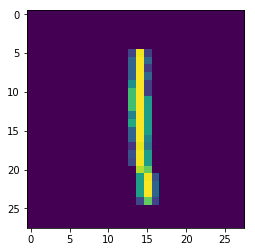

In [39]:
plt.imshow(X_train[0].reshape(28,28))
print(Y_train[0])

In [40]:
model = Sequential()
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr = learning_rate ),
              metrics=['accuracy'])


## Construct and Run

In [41]:
history = model.fit(X_train,Y_train,batch_size=n_batch,
                                     epochs=epochs,
                                     verbose=1,
                                     validation_data=(X_val, Y_val), shuffle=True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 29s 543us/step - loss: 0.3271 - acc: 0.9109 - val_loss: 0.1860 - val_acc: 0.9498
Epoch 2/5
54000/54000 [==============================] - 29s 529us/step - loss: 0.1935 - acc: 0.9502 - val_loss: 0.1821 - val_acc: 0.9578
Epoch 3/5
17984/54000 [========>.....................] - ETA: 19s - loss: 0.1663 - acc: 0.9576

KeyboardInterrupt: 

## Evaluate Performance on the test data

In [42]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2177767854694277
Test accuracy: 0.9455


## Tensorboard

In the last section we have used Tensorboard to look at some simple computation graph. Keras provided a simple functionality to incorporate our model into Tensorboard. It can be used to monitor the training process, the entire architecture of the deep learning model and their associated weights, and many more: check out this link:
https://keras.io/callbacks/

In [45]:
## initialise tensorboard call back object
csvlogger = keras.callbacks.CSVLogger("./Graph/training_log.csv", separator=',', append=False)


tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', 
                                         histogram_freq=1, 
                                         write_graph=True, 
                                         write_images=False,update_freq='epoch',batch_size=n_batch)

history = model.fit(X_train,Y_train,batch_size=n_batch,
                                     epochs=epochs,
                                     verbose=1,
                                     validation_data=(X_val, Y_val), shuffle=True,callbacks=[tbCallBack,csvlogger])

KeyboardInterrupt: 

# What about Tensorflow?


We have been talking about PyTorch, Keras etc, but where is Tensorflow ?
Tensorflow implementation is actually less straight forward. As you have seen in the previous seminar, to run a deep learning model we will need to the following:
1. Define the variables (placeholders) for any input to the computational graph
2. Define the computational graph ( in this case, our deep learning model)
3. Define the loss function and optimizer
4. Start a session and train it

## Import module

In [2]:
import tensorflow as tf
## Tensorflow has also created a module for MNIST dataset
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
## load the data, set one hot to True, similar to what we did in keras.utils.to_categorical
mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)



Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


## Hyperparameters

In [4]:
## number of nodes for different hidden layers
n_nodes_hl1 = 1024
n_nodes_hl2 = 512
n_nodes_hl3 = 128


In [5]:
## Define our variables. 784 is the flatten version of the 28x28 image
input_data = tf.placeholder('float', [None, 28*28])
target = tf.placeholder('float')



## Define the Neural Network Model

In [6]:
def neural_network_model(data):
    #initialise weights for different hidden layers
    hidden_1_layer = {'weights':tf.Variable(tf.random_normal([28*28, n_nodes_hl1])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}

    hidden_2_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}

    hidden_3_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))}

    output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3, n_classes])),
                    'biases':tf.Variable(tf.random_normal([n_classes])),}


    layer1 = tf.add(tf.matmul(data,hidden_1_layer['weights']), hidden_1_layer['biases'])
    layer1 = tf.nn.relu(layer1)

    layer2 = tf.add(tf.matmul(layer1,hidden_2_layer['weights']), hidden_2_layer['biases'])
    layer2 = tf.nn.relu(layer2)

    layer3 = tf.add(tf.matmul(layer2,hidden_3_layer['weights']), hidden_3_layer['biases'])
    layer3 = tf.nn.relu(layer3)

    output = tf.matmul(layer3,output_layer['weights']) + output_layer['biases']

    return output



In [17]:
prediction = neural_network_model(input_data)
# OLD VERSION:
#cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(prediction,y) )
# NEW:
cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2(logits=prediction, labels=target) )
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

with tf.Session() as sess:
    # OLD:
    #sess.run(tf.initialize_all_variables())
    # NEW:
    sess.run(tf.global_variables_initializer())
    ## epochs, number of times NN will see the data
    for epoch in range(epochs):
        epoch_loss = 0
        for _ in range(int(mnist.train.num_examples/n_batch)):
            epoch_x, epoch_y = mnist.train.next_batch(n_batch)
            _, c = sess.run([optimizer, cost], feed_dict={input_data: epoch_x, target: epoch_y})
            epoch_loss += c

        print('Epoch', epoch, 'completed out of',epochs,'loss:',epoch_loss)
    correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(target, 1))

    accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
    print('Accuracy:',accuracy.eval({input_data:mnist.test.images, target:mnist.test.labels}))



Epoch 0 completed out of 5 loss: 1357915.1335601807
Epoch 1 completed out of 5 loss: 280879.22898864746
Epoch 2 completed out of 5 loss: 141985.88475704193
Epoch 3 completed out of 5 loss: 80733.3616547263
Epoch 4 completed out of 5 loss: 51478.91358392696
Accuracy: 0.9469


In [13]:
mnist.test.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

# Keras or Tensorflow? Why not both?

## Tensorflow 2-Alpha

Tensorflow 2 is a major update from the Tensforflow team. As quoted from the website, "TensorFlow 2.0 focuses on simplicity and ease of use, with updates like eager execution, intuitive higher-level APIs, and flexible model building on any platform.", lets have a look at the implementation from Tensorflow 2

In [214]:
## import modules
#from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
#!pip install -q tensorflow==2.0.0-alpha0

#import tensorflow as tf

## load data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test)

Epoch 1/5
 6336/60000 [==>...........................] - ETA: 11s - loss: 0.7078 - acc: 0.7972

KeyboardInterrupt: 

## Examples of using AI in the field of astronomy

Deep learning of multi-element abundances from high-resolution spectroscopic data https://arxiv.org/abs/1808.04428


Galaxy detection and identification using deep learning and dataaugmentation 
https://arxiv.org/pdf/1809.01691.pdf

CosmoFlow: Using Deep Learning to Learn the Universe at Scale
https://arxiv.org/pdf/1808.04728.pdf

Identifying Exoplanets with Deep Learning: A Five-planet Resonant Chain around Kepler-80 and an Eighth Planet around Kepler-90
https://iopscience.iop.org/article/10.3847/1538-3881/aa9e09/pdf

### Why Neural Networks?

Neural network are very flexible function estimators that learn through being shown "examples". Compared to other techniques, a strength of Neural Networks is that they can be customized to fit the structure of a dataset (Convolutional Neural Networks for images, Recurrent Neural Networks for time-series). Another advantage is that once trained, they can yield very quick predictions.

Unlike other algorithms like Support Vector Machines or Linear Regression, the loss function they minimize is not convex (ie it does not have a single minimum). Instead it has multiple minimums, and in training we are interested in finding a suitably good minimum (as opposed to a global minimum). This means that their training can sometimes be a lot more fiddly. The loss function that you minimize can also be modified to fit the task you are trying to accomplish (see VAE or GAN for example).

There is actually an interesting debate going on about whether deep learning methods should be assumption driven or whether they should be fully black-box methods. (see this open letter by max welling for example https://staff.fnwi.uva.nl/m.welling/wp-content/uploads/Model-versus-Data-AI-1.pdf)

This picture shows the loss function with only 2 parameters. As always our intuition breaks down, neural networks will usually have tens of thousands of parameters. A minima will then only occur when all dimenions are at a minimum (otherwise saddle point). As such, its alot harder to reach a local minima. This is the same type of insight as the lottery ticket paper (see link). 